## Advanced Machine Learning - Scikit Learn 
### with Adreas Mueller

## Trees and Forests
Easy to interpret and understand, yet powerful learning machines, algorithms based on decision tress
* Decision tree encodes a series of 'if'-'and'-'else' choices, similar to how a person might make a decision
* Which questions to ask, and how to proceed are queestions entirely learned from the data
* There are Regression and Classification variants of all tree based algorithms; focus here on classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Decision Tree Classification
* Use toy dataset to build a decision tree, step-by-step, to separate the red from blue data points. At each step, the decision tree finds the threshold for a single feature that is most informative about separating the classes
* First step: uses x[0] on x-axis of plot and thresholds it around 1; with 23 blue points, 6 red on the left, and 2 blue and 19 red points on the right. The shade of each area represents which class is more frequent in a region.
* Second step: Tree uses splits on X[1] to split off some red points from the blue region, and some blue points from the red region, making all the regions more pure in their class
* We keep spliting the regions, which correspond to leaves in a decision tree, until each region contains only a single class. 

### Prediction from the Tree
* To make a prediction in a decision tree, we just need to find out which region a point lies in
* This can be done efficiently, checking at each node whether the feature is smaller or larger than the threshold 
* Prediction is the majority class falling into each leaf; deeper the tree, the more complex the decision boundary

### Limiting depth of Tree
* Natural way to regularize the decision tree classifier and prevent overfitting using the max_depth parameter 
* Limit the number of leaves using max_leaves
* Setting the minimum number of points in each regions using min_sample_leaf

//anaconda/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


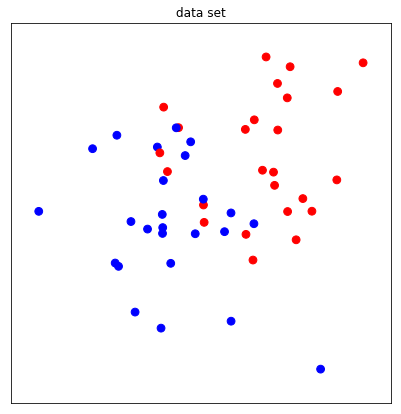

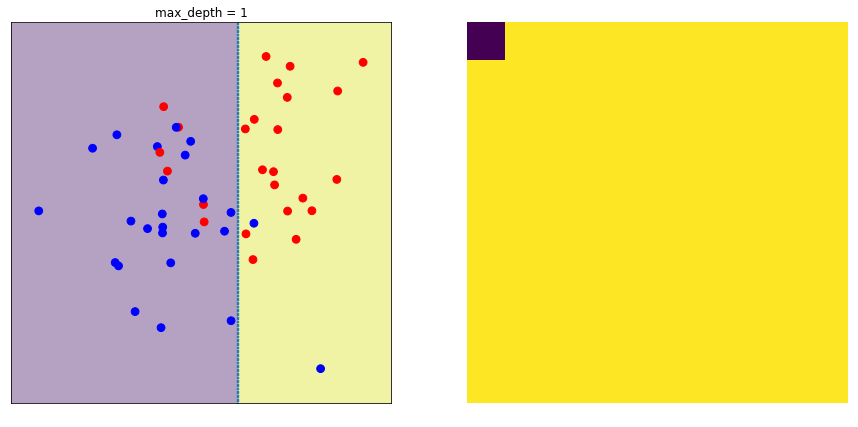

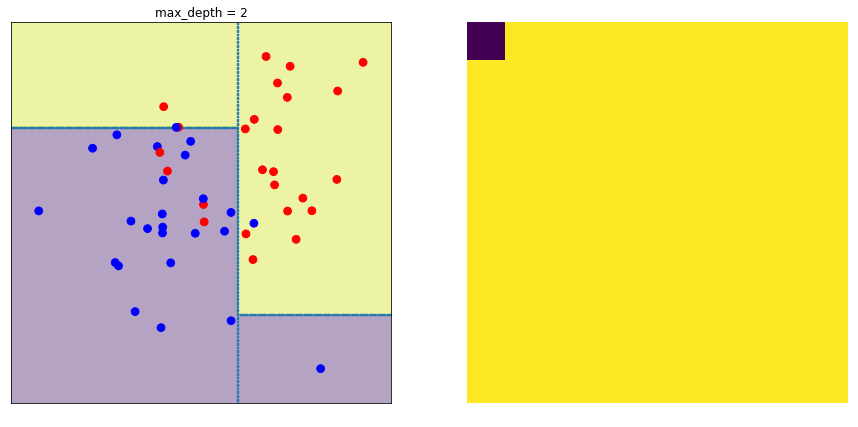

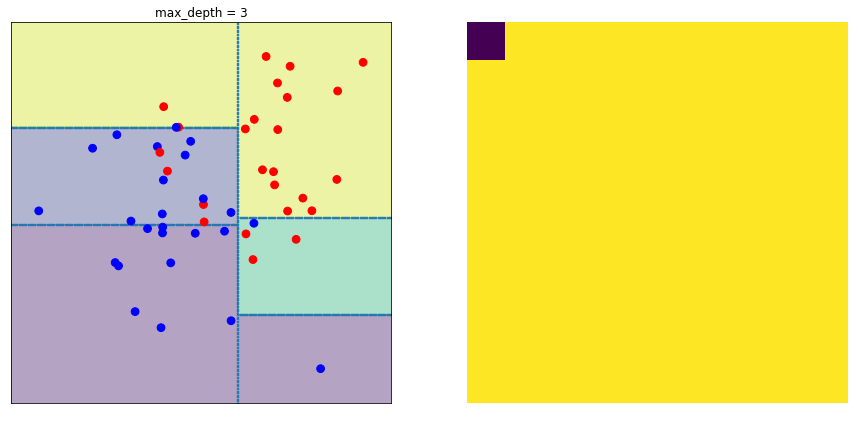

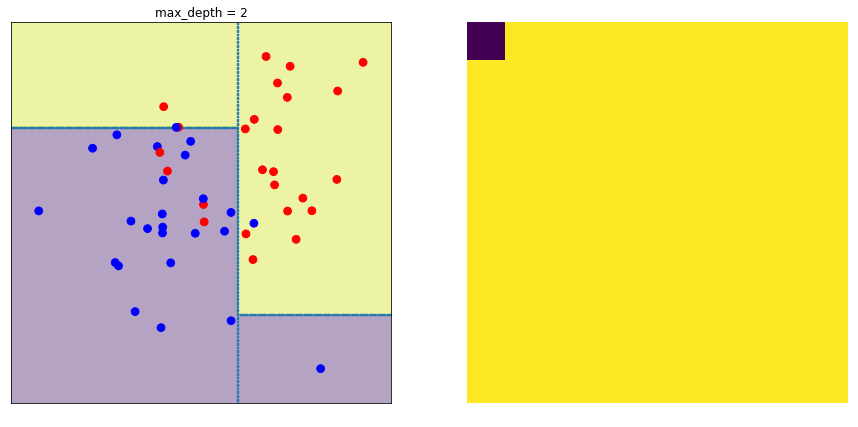

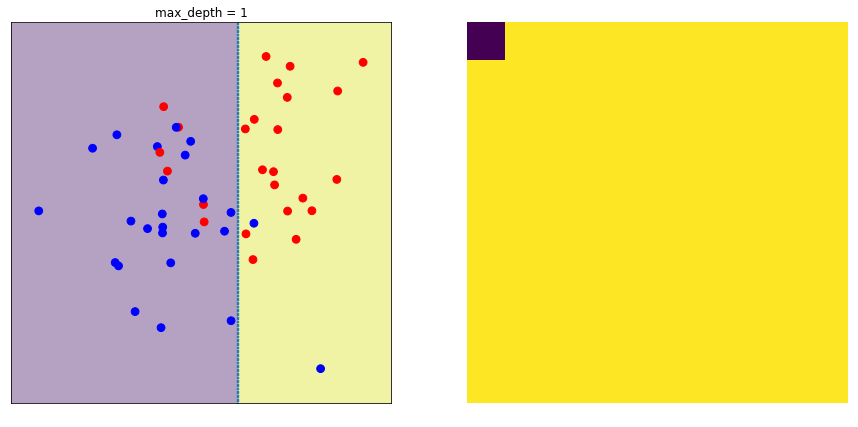

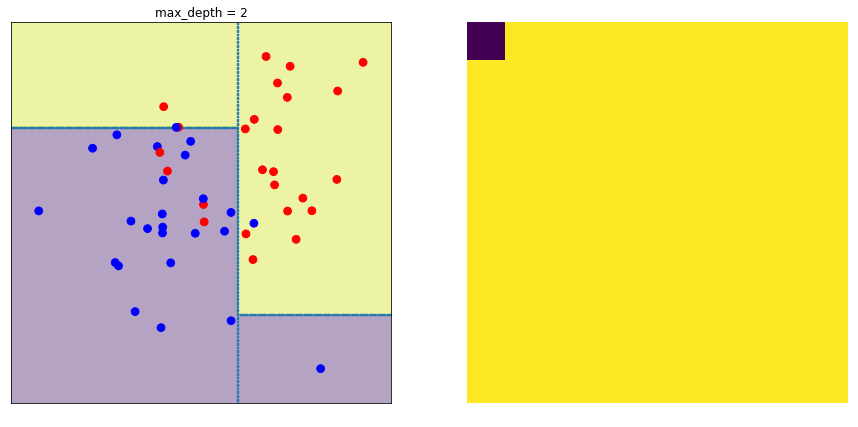

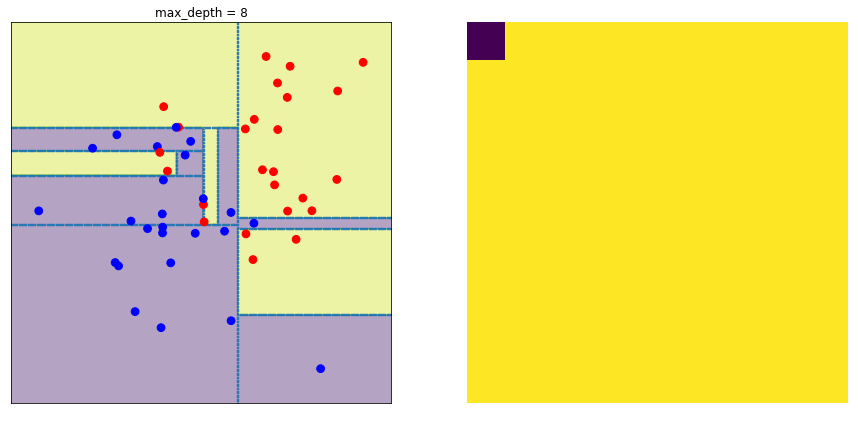

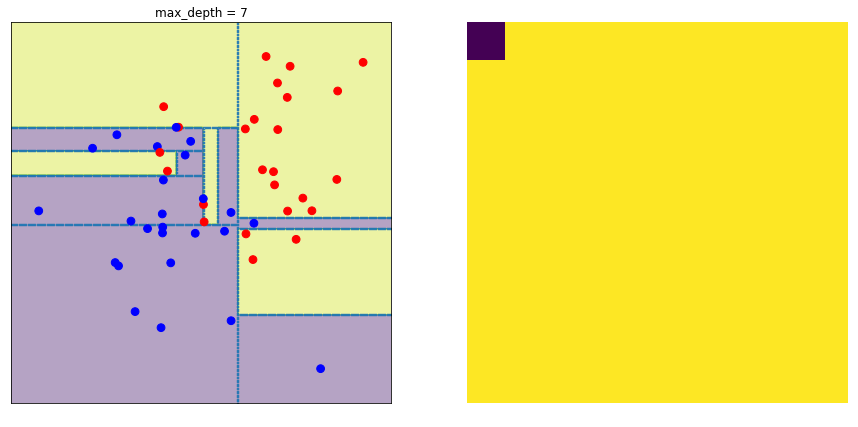

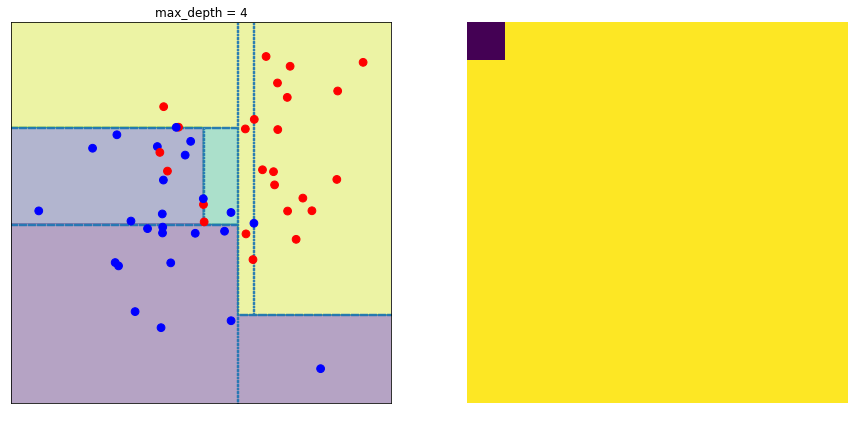

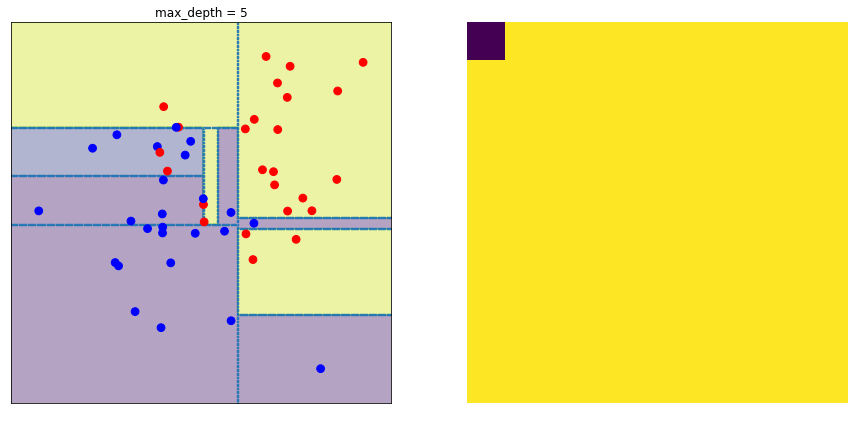

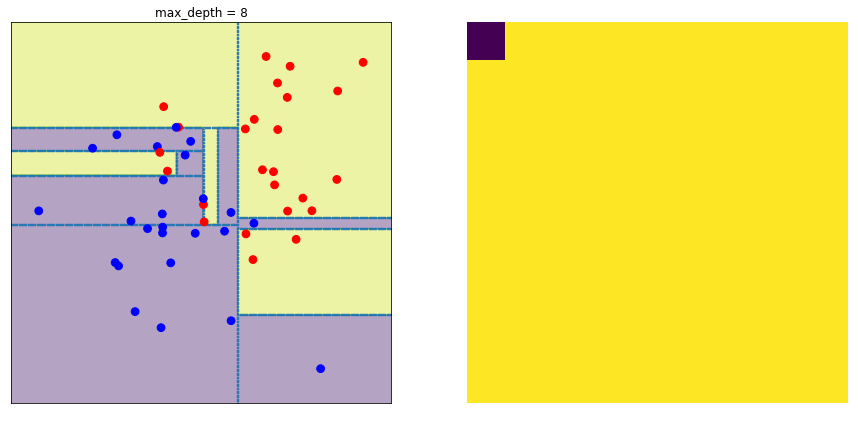

In [3]:
from figures import plot_tree_interactive
plot_tree_interactive()

## Random Forests
* Combining multiple trees generated from different random subsets of the data
* Using different random subsets of the features for each split, makes each of trees different from others, and each focuses on different features of the data
* Using the average of the ensemble trees prediction leads to a smoother decision that overfits less 

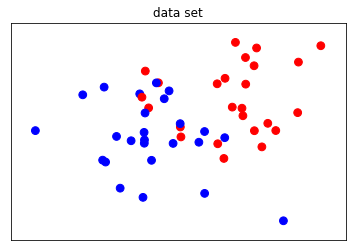

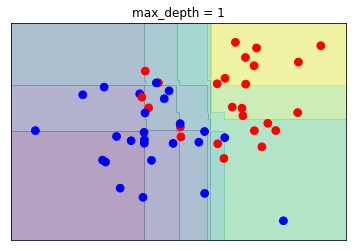

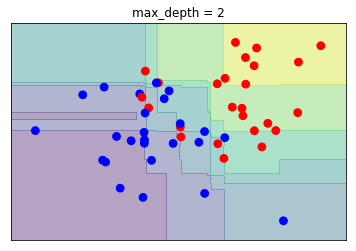

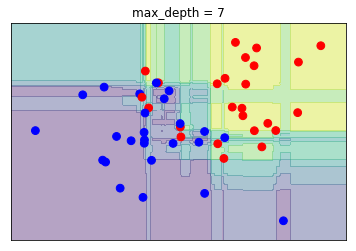

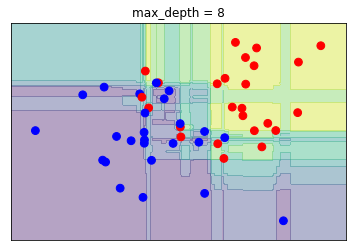

In [4]:
from figures import plot_forest_interactive
plot_forest_interactive()

## Selecting the Optimal Estimator via Cross-Validation

In [7]:
from sklearn import grid_search
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
parameters = {'max_features':['sqrt', 'log2'],
              'max_depth':[5, 7, 9]}

clf_grid = grid_search.GridSearchCV(rf, parameters)
clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': ['sqrt', 'log2'], 'max_depth': [5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [8]:
clf_grid.score(X_train, y_train)

1.0

In [9]:
clf_grid.score(X_test, y_test)

0.97555555555555551